In [12]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Load data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step 
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 50s 2us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 9s 2us/step


In [3]:
# Normalize
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
# Reshape for CNN
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [5]:
# Define model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train
model.fit(train_images, train_labels, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.7348 - loss: 0.7234 - val_accuracy: 0.8467 - val_loss: 0.4177
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 22ms/step - accuracy: 0.8731 - loss: 0.3525 - val_accuracy: 0.8765 - val_loss: 0.3339
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.8966 - loss: 0.2835 - val_accuracy: 0.8950 - val_loss: 0.2881
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9077 - loss: 0.2521 - val_accuracy: 0.9003 - val_loss: 0.2818
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.9169 - loss: 0.2243 - val_accuracy: 0.9028 - val_loss: 0.2720


In [8]:
# Evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8963 - loss: 0.2995
Test Accuracy: 0.8967000246047974


Nice! With a test accuracy of 89.67%, our CNN model is performing very well, especially for a relatively simple 6-layer architecture trained on the Fashion MNIST dataset.
________________________________________
✅ Detailed Interpretation of the Result
📌 Test Accuracy: 89.67%
This means that our model correctly predicted the fashion item label for approximately 9 out of every 10 images in the test dataset.
Given that:
•	Fashion MNIST has 10 classes (e.g., T-shirt, Trouser, Pullover, etc.)
•	The test set includes 10,000 images
•	Our model correctly predicted ~8,967 of them
________________________________________
📈 What Contributes to This Accuracy?
Our CNN is made up of:
•	3 Convolutional Layers → Learn local patterns like edges, textures, and shapes
•	ReLU Activations → Add non-linearity
•	MaxPooling → Reduces dimensions and retains important features
•	Dense Layers → Combine features for final decision
•	Softmax Output → Converts output to class probabilities
These components enable the model to progressively learn abstract features, improving classification ability.
________________________________________
🔍 Why Not 100%?
Even high-performing models rarely reach 100% accuracy due to:
•	Class overlap (e.g., T-shirts vs. Tops may look similar)
•	Image noise or ambiguity
•	Model complexity limits (only 6 layers in our case)
•	No data augmentation or regularization used here
If needed, we could boost accuracy by:
•	Adding more layers or filters
•	Training for more epochs
•	Using data augmentation (rotation, flipping)
•	Applying dropout for regularization


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


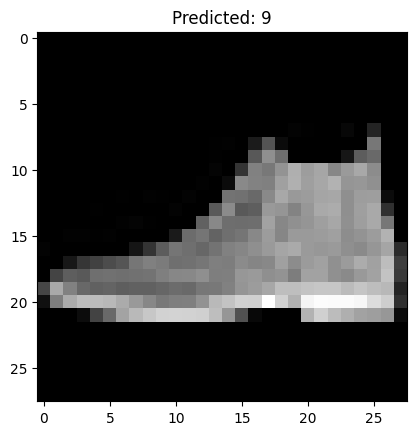

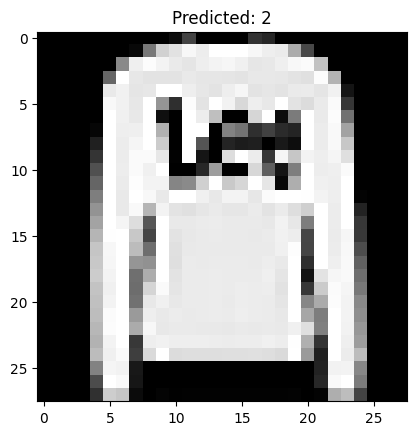

In [13]:
# Ensure the folder exists
os.makedirs('predictions', exist_ok=True)

# Predict on 2 test images
predictions = model.predict(test_images[:2])
for i in range(2):
    plt.imshow(test_images[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.savefig(f"predictions/image{i+1}.png")
    plt.show()

Description:
•	The image shows a high-top sneaker or ankle boot.
•	Fashion MNIST class 9 = Ankle boot
✅ The prediction is correct — our CNN model has identified the shoe's structure: the sole, the upward extension around the ankle, etc.
________________________________________


Image 2: Predicted: 2
🔍 Description:
•	The image shows a pullover or long-sleeve shirt.
•	Fashion MNIST class 2 = Pullover
✅ This prediction is also correct. We can see the long sleeves, neckline, and center design (looks like a logo).
